Objetivo: Através de um título passado, com base em análise de "emoção" no título, prever se é classificada como "EXCITING" ou "NORMAL"

Algoritimo utilizado para predição: `LogisticRegression`

In [1026]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [1027]:
df = pd.read_csv('love_live_songs.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         192 non-null    object 
 1   album         192 non-null    object 
 2   attribution   192 non-null    object 
 3   members       192 non-null    object 
 4   release_date  192 non-null    object 
 5   bpm           191 non-null    float64
 6   duration      189 non-null    object 
dtypes: float64(1), object(6)
memory usage: 10.6+ KB


In [1028]:
def durations_mean(track_durations: list[str]) -> str:
    total_seconds = 0
    for duration in track_durations:
        if np.nan_to_num(duration) != 0.0:
            minutes, seconds = map(int, str(np.nan_to_num(duration)).split(':'))
            total_seconds += minutes * 60 + seconds

    mean_seconds = total_seconds / len(track_durations)
    mean_aproach = round(mean_seconds)

    minutes = mean_aproach // 60
    seconds = mean_aproach % 60

    return f"{minutes}:{seconds:02d}"

In [1029]:
df['duration'].fillna(durations_mean(df['duration']), inplace=True)

C:\Users\felip\AppData\Local\Temp\ipykernel_27300\3311466427.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration'].fillna(durations_mean(df['duration']), inplace=True)


In [1030]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         192 non-null    object 
 1   album         192 non-null    object 
 2   attribution   192 non-null    object 
 3   members       192 non-null    object 
 4   release_date  192 non-null    object 
 5   bpm           191 non-null    float64
 6   duration      192 non-null    object 
dtypes: float64(1), object(6)
memory usage: 10.6+ KB


In [1031]:
df['bpm'].fillna(df['bpm'].mean(), inplace=True)

C:\Users\felip\AppData\Local\Temp\ipykernel_27300\81797966.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bpm'].fillna(df['bpm'].mean(), inplace=True)


In [1032]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         192 non-null    object 
 1   album         192 non-null    object 
 2   attribution   192 non-null    object 
 3   members       192 non-null    object 
 4   release_date  192 non-null    object 
 5   bpm           192 non-null    float64
 6   duration      192 non-null    object 
dtypes: float64(1), object(6)
memory usage: 10.6+ KB


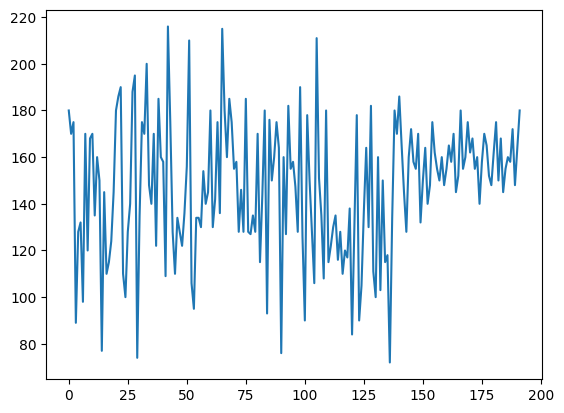

In [1033]:
plt.plot(df['bpm'])

In [1034]:
def _classfyRhythm(bpm):
    if bpm > 120:
        return 'Exciting'
    if bpm < 80:
        return 'Slow'
    return 'Normal'

df['Rhythm'] = df['bpm'].apply(_classfyRhythm)

In [1035]:
df.head()

,title,album,attribution,members,release_date,bpm,duration,Rhythm
0,Heartbeat Runners,TOKIMEKI Runners,Nijigasaki (9 Members),"Ayumu Uehara, Kasumi Nakasu, Shizuku Osaka, Ka...",2018.11.21,180.0,4:36,Exciting
1,A Step Towards the Dream,TOKIMEKI Runners,Ayumu Uehara,Ayumu Uehara,2018.11.21,170.0,4:47,Exciting
2,Diamond,TOKIMEKI Runners,Kasumi Nakasu,Kasumi Nakasu,2018.11.21,175.0,3:53,Exciting
3,Your Ideal Heroine,TOKIMEKI Runners,Shizuku Osaka,Shizuku Osaka,2018.11.21,89.0,5:26,Normal
4,Starlight,TOKIMEKI Runners,Karin Asaka,Karin Asaka,2018.11.21,128.0,3:44,Exciting


In [1036]:
def _classfyRhythmLabel(rhythm):
    if rhythm == 'Normal':
        return 1
    elif rhythm == 'Exciting':
        return 2
    return 0

df['Rhythm_Label'] = df['Rhythm'].apply(_classfyRhythmLabel)

In [1037]:
def _formatDate(date:str):
    format1 = date.replace('.', '/')
    format2 = format1.replace('-', '/')
    return format2


df['release_date'] = df['release_date'].apply(_formatDate)

In [1038]:
df.head(20)

,title,album,attribution,members,release_date,bpm,duration,Rhythm,Rhythm_Label
0,Heartbeat Runners,TOKIMEKI Runners,Nijigasaki (9 Members),"Ayumu Uehara, Kasumi Nakasu, Shizuku Osaka, Ka...",2018/11/21,180.0,4:36,Exciting,2
1,A Step Towards the Dream,TOKIMEKI Runners,Ayumu Uehara,Ayumu Uehara,2018/11/21,170.0,4:47,Exciting,2
2,Diamond,TOKIMEKI Runners,Kasumi Nakasu,Kasumi Nakasu,2018/11/21,175.0,3:53,Exciting,2
3,Your Ideal Heroine,TOKIMEKI Runners,Shizuku Osaka,Shizuku Osaka,2018/11/21,89.0,5:26,Normal,1
4,Starlight,TOKIMEKI Runners,Karin Asaka,Karin Asaka,2018/11/21,128.0,3:44,Exciting,2
5,Super Going!!,TOKIMEKI Runners,Ai Miyashita,Ai Miyashita,2018/11/21,132.0,4:46,Exciting,2
6,I Want to Go to the Sleeping Forest,TOKIMEKI Runners,Kanata Konoe,Kanata Konoe,2018/11/21,98.0,3:24,Normal,1
7,CHASE!,TOKIMEKI Runners,Setsuna Yuki,Setsuna Yuki,2018/11/21,170.0,4:18,Exciting,2
8,Evergreen,TOKIMEKI Runners,Emma Verde,Emma Verde,2018/11/21,120.0,4:55,Normal,1
9,Heartbeat * Emotion,TOKIMEKI Runners,Rina Tennoji,Rina Tennoji,2018/11/21,168.0,4:30,Exciting,2


In [1039]:
df['members'].unique()

array(['Ayumu Uehara, Kasumi Nakasu, Shizuku Osaka, Karin Asaka, Ai Miyashita, Kanata Konoe, Setsuna Yuki, Emma Verde, Rina Tennoji',
       'Ayumu Uehara', 'Kasumi Nakasu', 'Shizuku Osaka', 'Karin Asaka',
       'Ai Miyashita', 'Kanata Konoe', 'Setsuna Yuki', 'Emma Verde',
       'Rina Tennoji',
       'Ayumu Uehara, Kasumi Nakasu, Shizuku Osaka, Karin Asaka, Ai Miyashita, Kanata Konoe, Setsuna Yuki, Emma Verde, Rina Tennoji, Shioriko Mifune',
       'Shioriko Mifune',
       'Ayumu Uehara, Kasumi Nakasu, Shizuku Osaka, Karin Asaka, Ai Miyashita, Kanata Konoe, Setsuna Yuki, Emma Verde, Rina Tennoji, Shioriko Mifune, Mia Taylor, Lanzhu Zhong',
       'Mia Taylor', 'Lanzhu Zhong',
       'Shioriko Mifune, Mia Taylor, Lanzhu Zhong',
       'Karin Asaka, Ai Miyashita',
       'Ayumu Uehara, Shizuku Osaka, Setsuna Yuki',
       'Kasumi Nakasu, Kanata Konoe, Emma Verde, Rina Tennoji',
       'Kasumi Nakasu, Shizuku Osaka, Rina Tennoji, Shioriko Mifune',
       'Honoka, Eli, Kotori, Umi, Rin

In [1040]:
# %pip install nltk

In [1041]:
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer

In [1042]:
# nltk.download('all')

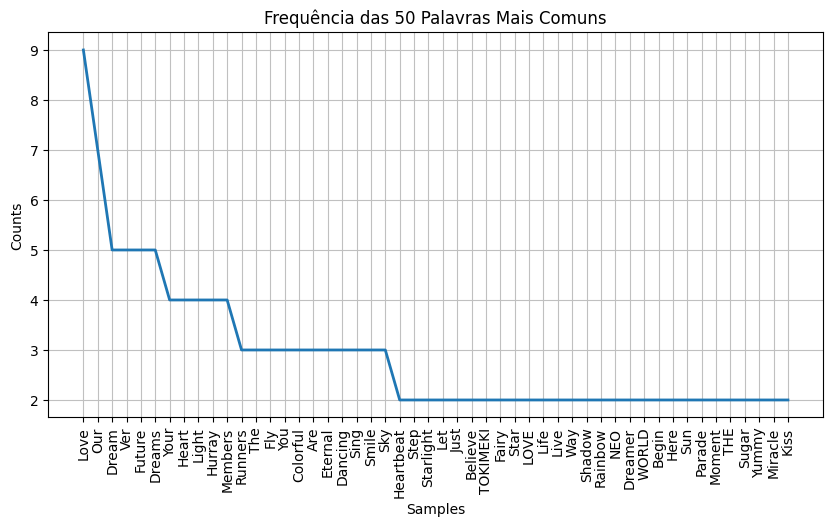

In [1043]:
tokens = word_tokenize(df['title'].to_string())

stop_words = set(stopwords.words('english'))
words = [word for word in tokens if word.isalnum() and word not in stop_words and len(word) >= 3]

freq_dist = nltk.FreqDist(words)

plt.figure(figsize=(10, 5))
freq_dist.plot(50, title='Frequência das 50 Palavras Mais Comuns')
plt.show()

In [1044]:
import re

def normalize_text(text: str):

    text = text.lower()
    
    # Remover pontuação
    text = re.sub(r'[^\w\s]', '', text)
    
    tokens = word_tokenize(text)
    
    # Remover stopwords
    tokens = [t for t in tokens if t not in stopwords.words('english')]

    # Stemming e Lemmatization
    from nltk.stem import PorterStemmer
    stemmer = PorterStemmer()
    df['title'] = df['title'].apply(lambda tokens: [stemmer.stem(t) for t in tokens])

    lemmatizer = WordNetLemmatizer()
    df['title'] = df['title'].apply(lambda words: [lemmatizer.lemmatize(word) for word in words])
    
    return ' '.join(tokens)  # Juntar tokens para o TF-IDF

df['title'] = df['title'].apply(normalize_text)

In [1045]:
df.head()

,title,album,attribution,members,release_date,bpm,duration,Rhythm,Rhythm_Label
0,heartbeat runners,TOKIMEKI Runners,Nijigasaki (9 Members),"Ayumu Uehara, Kasumi Nakasu, Shizuku Osaka, Ka...",2018/11/21,180.0,4:36,Exciting,2
1,step towards dream,TOKIMEKI Runners,Ayumu Uehara,Ayumu Uehara,2018/11/21,170.0,4:47,Exciting,2
2,diamond,TOKIMEKI Runners,Kasumi Nakasu,Kasumi Nakasu,2018/11/21,175.0,3:53,Exciting,2
3,ideal heroine,TOKIMEKI Runners,Shizuku Osaka,Shizuku Osaka,2018/11/21,89.0,5:26,Normal,1
4,starlight,TOKIMEKI Runners,Karin Asaka,Karin Asaka,2018/11/21,128.0,3:44,Exciting,2


In [1046]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment


df['sentiment'] = df['title'].apply(get_sentiment)

df[150:].head(20)

,title,album,attribution,members,release_date,bpm,duration,Rhythm,Rhythm_Label,sentiment
150,dancing moonlight castle,Kaguya no Shiro de Odoritai,Eli Ayase,"Eli, Nozomi, Nico",2014/07/09,150.0,03:58,Exciting,2,0
151,dancing stars,Dancing stars on me!,Honoka Kosaka,"Honoka, Eli, Kotori, Umi, Rin, Maki, Nozomi, H...",2014/04/23,164.0,04:16,Exciting,2,0
152,love wing bell,Love wing bell,Kotori Minami,"Kotori, Umi, Maki, Rin, Hanayo",2014/08/27,140.0,04:10,Exciting,2,1
153,momentary romantic,Shunjou Romantic,Nozomi Tojo,"Nozomi, Eli, Nico",2015/05/27,148.0,03:50,Exciting,2,1
154,cutie panther,Cutie Panther,Eli Ayase,"Eli, Nico, Maki",2013/08/28,175.0,03:30,Exciting,2,1
155,soldier game,Soldier game,Umi Sonoda,"Umi, Honoka, Kotori",2013/04/10,162.0,04:00,Exciting,2,0
156,angelic angel,Angelic Angel,Honoka Kosaka,"Honoka, Eli, Kotori, Umi, Rin, Maki, Nozomi, H...",2015/07/08,155.0,04:35,Exciting,2,0
157,heart shining,Kimi no Kokoro wa Kagayaiteru kai?,Chika Takami,"Chika, Riko, Kanan, Dia, You, Yoshiko, Hanamar...",2016/04/27,150.0,04:25,Exciting,2,0
158,happy party train,HAPPY PARTY TRAIN,Chika Takami,"Chika, Riko, Kanan, Dia, You, Yoshiko, Hanamar...",2017/04/05,160.0,04:40,Exciting,2,1
159,dancetonight,MY Mai☆TONIGHT,Chika Takami,"Chika, Riko, Kanan, Dia, You, Yoshiko, Hanamar...",2016/08/03,148.0,04:15,Exciting,2,0


In [1047]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['title'])
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

clf = LogisticRegression(random_state=50)

clf.fit(X_train, y_train)

LogisticRegression(random_state=50)

In [1048]:
clf.predict_proba(X)

array([[0.76630659, 0.23369341],
       [0.36725993, 0.63274007],
       [0.55006354, 0.44993646],
       [0.55006354, 0.44993646],
       [0.73430365, 0.26569635],
       [0.50310729, 0.49689271],
       [0.55006354, 0.44993646],
       [0.75997318, 0.24002682],
       [0.67935065, 0.32064935],
       [0.7795738 , 0.2204262 ],
       [0.31970388, 0.68029612],
       [0.73430365, 0.26569635],
       [0.67935065, 0.32064935],
       [0.73430365, 0.26569635],
       [0.55006354, 0.44993646],
       [0.73430365, 0.26569635],
       [0.73430365, 0.26569635],
       [0.7557344 , 0.2442656 ],
       [0.71701307, 0.28298693],
       [0.73430365, 0.26569635],
       [0.71853152, 0.28146848],
       [0.73420057, 0.26579943],
       [0.73430365, 0.26569635],
       [0.67935065, 0.32064935],
       [0.67935065, 0.32064935],
       [0.67935065, 0.32064935],
       [0.55006354, 0.44993646],
       [0.75995113, 0.24004887],
       [0.36051004, 0.63948996],
       [0.69795002, 0.30204998],
       [0.

In [1049]:
y_pred = clf.predict(X_test)
print(f'Acurácia: {accuracy_score(y_test, y_pred):.2f}')

Acurácia: 0.77


In [1050]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        27
           1       1.00      0.25      0.40        12

    accuracy                           0.77        39
   macro avg       0.88      0.62      0.63        39
weighted avg       0.83      0.77      0.72        39



<Axes: >

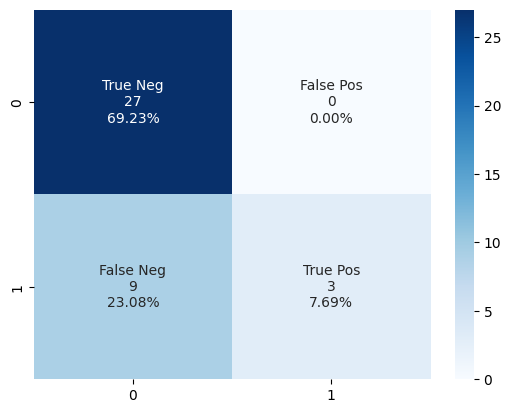

In [1051]:
pred_matrix = confusion_matrix(y_test, y_pred)

labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                pred_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     pred_matrix.flatten()/np.sum(pred_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(labels,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(pred_matrix, annot=labels, fmt='', cmap='Blues')

In [1052]:
novos_titulos = [
'In this present age',   
'Snow Halation',
'START:DASH!!',               
'Wonder Zone',                
'LOVE LOVE LOVE',             
'Susume→Tomorrow',            
'Music S.T.A.R.T!!',          
'That`s you!',           
'Love Marginal',              
'Coming closer with a tight "Love"!',
'Eternal Light',
'Love Magic!!',
'Shadow Effect',
]

novos_dados = vectorizer.transform(novos_titulos)

previsoes = clf.predict(novos_dados)

for i in range(0, len(previsoes)):
    feeling = 'EXCITING' if previsoes[i] == 1 else 'NORMAL'

    print(f'Sentimento de: {novos_titulos[i]} --> {feeling}')

Sentimento de: In this present age --> NORMAL
Sentimento de: Snow Halation --> NORMAL
Sentimento de: START:DASH!! --> NORMAL
Sentimento de: Wonder Zone --> NORMAL
Sentimento de: LOVE LOVE LOVE --> EXCITING
Sentimento de: Susume→Tomorrow --> NORMAL
Sentimento de: Music S.T.A.R.T!! --> NORMAL
Sentimento de: That`s you! --> NORMAL
Sentimento de: Love Marginal --> EXCITING
Sentimento de: Coming closer with a tight "Love"! --> EXCITING
Sentimento de: Eternal Light --> NORMAL
Sentimento de: Love Magic!! --> EXCITING
Sentimento de: Shadow Effect --> NORMAL
